In [92]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
#Load the data and merge the datasets
#Load the Datasets
profile_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_acs_file.csv", skiprows= 1)
acs_df = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ADA_profile_simplified.csv")

print("Profile Columns", profile_df.columns.to_list())
print("ACS Columns", acs_df.columns.to_list())

Profile Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'public_caf', 'public_ef', 'public_emp', 'public_gs', 'public_hf', 'public_psef', 'public_srf', 'walk_caf', 'walk_ef', 'walk_emp', 'walk_gs', 'walk_hf', 'walk_psef', 'walk_srf', 'ada_code_n', 'ADA_code']
ACS Columns ['CMANAME', 'CMAUID', 'CSDNAME', 'CSDUID', 'PRNAME', 'ada_code_n', 'ADA_code', 'T1527', 'T1528', 'T1529', 'T1530', 'T1531', 'T1532', 'T1533', 'T1534', 'T1535', 'T1536', 'T1537', 'T1538', 'T1539', 'T1540', 'T1541', 'T1542', 'T1543', 'T1544', 'T1545', 'T1546', 'T1547', 'T1548', 'T1549', 'T1550', 'T1551', 'T1552', 'T1553', 'T1554', 'T1555', 'T1556', 'T1557', 'T1558', 'T1559', 'T1560', 'T1561', 'T1562', 'T1563', 'T1564', 'T1565', 'T1566', 'T1567', 'T1568', 'T1569', 'T1570', 'T1571', 'T1572', 'T1573', 'T1574', 'T1575', 'T1576', 'T1577', 'T1578', 'T1579', 'T1580', 'T1581', 'T1582', 'T1583', 'T1584', 'T1585', 'T1586', 'T1587', 'T1588', 'T1589', 'T1590', 'T1591', 'T1592', 'T1593', 'T1594', 'T1595', 'T1596', 'T1597', 'T1598'

In [94]:
#Merge Datasets on ADA_code
df = pd.merge(profile_df, acs_df, on='ADA_code', how='inner')

#Please work lol
df.head()

,CMANAME_x,CMAUID_x,CSDNAME_x,CSDUID_x,public_caf,public_ef,public_emp,public_gs,public_hf,public_psef,...,W1673,W1674,W1675,W1676,W1677,W1678,W1679,W1680,W1681,W1682
0,Weak metropolitan influenced zone (N.L.) / Zon...,998,Old Perlican,1001343,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,20.0,0.0,10.0,0.0,0.0,0.0,10.0
1,St. John's,1,Pouch Cove,1001505,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Weak metropolitan influenced zone (N.L.) / Zon...,998,"Division No. 1, Subd. I",1001374,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,10.0,0.0,0.0,55.0,0.0,15.0,0.0,0.0,0.0,25.0
3,St. John's,1,St. John's,1001519,0.008549,0.008819,0.008912,24.173913,0.008047,0.016364,...,80.0,50.0,0.0,400.0,0.0,100.0,15.0,45.0,0.0,235.0
4,St. John's,1,Torbay,1001509,0.000000,0.000000,0.000131,NaN,0.000138,0.000000,...,35.0,0.0,0.0,80.0,0.0,10.0,10.0,0.0,0.0,55.0


In [95]:
#Focus on Ontario

df_ontario = df[df['PRNAME'] == 'Ontario'].copy()
print("Ontario ADAs:", df_ontario.shape[0])

Ontario ADAs: 1679


In [96]:
#Rename columns for simplicity
keep = {
    'ADA_code' : 'ADA_code',
    'CMANAME_x'  : 'CMA',
    # Women counts
    'W1674' : 'refugeeF',
    'W1677' : 'asylumF',
    'W1670' : 'econF',
    'W1581' : 'nigeriaF',
    'W1536' : 'recentF_16_21',
    'W1537' : 'nprF',
    # Men+women counts for totals
    'T1674' : 'refugee_all',
    'T1677' : 'asylum_all',
    'T1536' : 'recent_all_16_21',
    'T1527' : 'total_pop',
    # Service times (hrs)
    'public_hf' : 'clinic_hr',
    'public_srf': 'rec_hr'
}

df_ontario = df_ontario[list(keep.keys())].rename(columns=keep)
df_ontario.head()

,ADA_code,CMA,refugeeF,asylumF,econF,nigeriaF,recentF_16_21,nprF,refugee_all,asylum_all,recent_all_16_21,total_pop,clinic_hr,rec_hr
1566,35010001,Moderate metropolitan influenced zone (Ont.) /...,0.0,15.0,70.0,0.0,0.0,15.0,20.0,15.0,20.0,9900.0,0.000000,0.000000
1567,35010002,Strong metropolitan influenced zone (Ont.) / Z...,20.0,0.0,150.0,0.0,40.0,10.0,40.0,20.0,75.0,13215.0,0.000009,0.000000
1568,35010003,Strong metropolitan influenced zone (Ont.) / Z...,10.0,0.0,70.0,0.0,20.0,0.0,20.0,0.0,45.0,7325.0,0.000000,0.000000
1569,35010004,Cornwall,0.0,10.0,75.0,20.0,15.0,15.0,10.0,20.0,15.0,13410.0,0.000083,0.000040
1570,35010005,Moderate metropolitan influenced zone (Ont.) /...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000040,0.000281


In [97]:
#Calculate the shares
df_ontario['refugeeF_share'] = df_ontario['refugeeF'] / df_ontario['total_pop']
df_ontario['asylumF_share']  = df_ontario['asylumF']  / df_ontario['total_pop']
df_ontario['nprF_share']     = df_ontario['nprF']     / df_ontario['total_pop']

df_ontario['dominant_group'] = np.where(df_ontario['refugeeF_share'] >= 0.5,
                                   'Refugee‑dominated',
                                   'Economic‑dominated')
df_ontario[['refugeeF_share','asylumF_share','nprF_share']].describe(percentiles=[.25,.5,.75])['refugeeF_share'] = df_ontario['refugeeF'] / df_ontario['total_pop']
df_ontario['asylumF_share']  = df_ontario['asylumF']  / df_ontario['total_pop']
df_ontario['nprF_share']     = df_ontario['nprF']     / df_ontario['total_pop']

df_ontario['dominant_group'] = np.where(df_ontario['refugeeF_share'] >= 0.5,
                                   'Refugee‑dominated',
                                   'Economic‑dominated')
df_ontario[['refugeeF_share','asylumF_share','nprF_share']].describe(percentiles=[.25,.5,.75])




,refugeeF_share,asylumF_share,nprF_share
count,1645.000000,1645.000000,1645.000000
mean,0.018303,0.007882,0.010898
std,0.018815,0.008846,0.013957
min,0.000000,0.000000,0.000000
25%,0.003050,0.000655,0.001395
50%,0.013462,0.005508,0.006005
75%,0.027102,0.011667,0.015663
max,0.143519,0.063985,0.120072


In [98]:
df_ontario_og = df_ontario.copy() 
print(df_ontario_og.shape[0])     # save untouched Ontario slice


1679


In [99]:
num_cols = ['refugeeF','asylumF','nigeriaF','total_pop',
            'clinic_hr','rec_hr']

df_ontario[num_cols] = df_ontario[num_cols].replace([np.inf, -np.inf], np.nan)
df_ontario = df_ontario.dropna(subset=num_cols)

print("Rows after cleaning:", df_ontario.shape[0])

Rows after cleaning: 1604


In [100]:
lost = df_ontario_og[ ~df_ontario_og['ADA_code'].isin(df_ontario_og['ADA_code']) ]

lost['dominant_group'].value_counts(dropna=False)


Series([], Name: count, dtype: int64)

In [101]:
#Winsorize and convert the service times
for col in ['clinic_hr','rec_hr']:
    df_ontario[col+'_min'] = (df_ontario[col] * 60)\
                        .clip(upper=df_ontario[col].quantile(.99)*60)
    
#Handle the missing values: set to 99th cp
for col in ['clinic_hr_min','rec_hr_min']:
    cap = df_ontario[col].quantile(.99)
    df_ontario[col].fillna(cap + 10, inplace=True)

df_ontario[['clinic_hr_min','rec_hr_min']].describe()

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_60847/1569157324.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ontario[col].fillna(cap + 10, inplace=True)
/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_60847/1569157324.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,clinic_hr_min,rec_hr_min
count,1604.000000,1604.000000
mean,5.201461,5.139906
std,7.919555,7.420100
min,0.000000,0.000000
25%,0.035733,0.048897
50%,1.885906,2.090602
75%,6.300149,6.725177
max,35.460798,33.268850


In [102]:
lost = df_ontario[~df_ontario['ADA_code'].isin(df_ontario['ADA_code'])]
lost['dominant_group'].value_counts()

Series([], Name: count, dtype: int64)

In [106]:
df_ontario['refugee_vs_econ'] = np.where(df_ontario['refugeeF'] >= df_ontario['econF'],
                                    'Refugees≥Econ',
                                    'Econ>Refugees')
#see the results
df_ontario.head()

,ADA_code,CMA,refugeeF,asylumF,econF,nigeriaF,recentF_16_21,nprF,refugee_all,asylum_all,...,clinic_hr,rec_hr,refugeeF_share,asylumF_share,nprF_share,dominant_group,clinic_hr_min,rec_hr_min,refugee_vs_econ,clinic_min
1566,35010001,Moderate metropolitan influenced zone (Ont.) /...,0.0,15.0,70.0,0.0,0.0,15.0,20.0,15.0,...,0.000000,0.00000,0.000000,0.001515,0.001515,Economic‑dominated,0.000000,0.00000,Econ>Refugees,0.000000
1567,35010002,Strong metropolitan influenced zone (Ont.) / Z...,20.0,0.0,150.0,0.0,40.0,10.0,40.0,20.0,...,0.000009,0.00000,0.001513,0.000000,0.000757,Economic‑dominated,0.000566,0.00000,Econ>Refugees,0.000566
1568,35010003,Strong metropolitan influenced zone (Ont.) / Z...,10.0,0.0,70.0,0.0,20.0,0.0,20.0,0.0,...,0.000000,0.00000,0.001365,0.000000,0.000000,Economic‑dominated,0.000000,0.00000,Econ>Refugees,0.000000
1569,35010004,Cornwall,0.0,10.0,75.0,20.0,15.0,15.0,10.0,20.0,...,0.000083,0.00004,0.000000,0.000746,0.001119,Economic‑dominated,0.004996,0.00242,Econ>Refugees,0.004996
1571,35010006,Strong metropolitan influenced zone (Ont.) / Z...,0.0,0.0,65.0,0.0,15.0,0.0,10.0,10.0,...,0.000002,0.00000,0.000000,0.000000,0.000000,Economic‑dominated,0.000123,0.00000,Econ>Refugees,0.000123


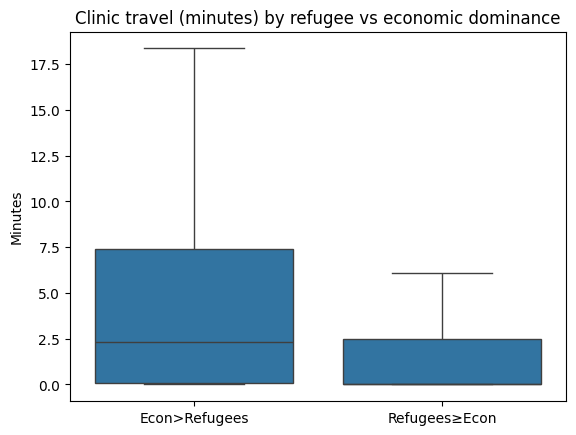

In [107]:
# Convert hours → minutes if you haven't already
df_ontario['clinic_min'] = df_ontario['clinic_hr'] * 60
# Winsorise the minute version (99 %)
cap = df_ontario['clinic_min'].quantile(.99)
df_ontario['clinic_min'] = df_ontario['clinic_min'].clip(upper=cap)

# Quick box‑plot in minutes
import seaborn as sns, matplotlib.pyplot as plt
sns.boxplot(data=df_ontario, x='refugee_vs_econ', y='clinic_min', showfliers=False)
plt.title('Clinic travel (minutes) by refugee vs economic dominance')
plt.ylabel('Minutes'); plt.xlabel('')
plt.show()

Econ > Refugees are the neighbourhods where economic-immigrant women out-number regugee women,

Refugeees >= Econ  are the neighbourhoods where refugeee women are at least as meany as economic-immigrant women.

The mean for Econ > Refugees is around 2-3 mins with the top whisker being around18 mins. 

This means that when economic-immigrant women are more than refugeee women, the average travel time is around 2-3 mins. In neighbourhoods where refugeee women are more than economic-immigrant women, the average travel time is under 1 min and even the slowest take only 6 mins.

So refugee-heavy areas actually have better clinic access than economic-immigrant areas in Ontario. (Find the specific areas and put them on a map) 

This flips the usual “refugees are worse off” assumption. For clinics, the geography (many refugees settle in urban cores) seems to give them quicker access than economic‑immigrant women who are more spread into suburbs.

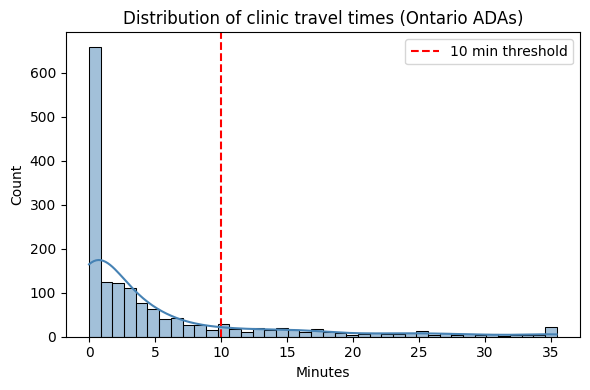

In [108]:
#Making the histogram
plt.figure(figsize=(6,4))
sns.histplot(df_ontario['clinic_hr_min'], bins=40, kde=True, color='steelblue')
plt.axvline(10, color='red', linestyle='--', label='10 min threshold')
plt.title('Distribution of clinic travel times (Ontario ADAs)')
plt.xlabel('Minutes'); plt.legend()
plt.tight_layout()
plt.show()

In [109]:
#Save the csv
df_ontario.to_csv('ontario.csv', index=False)



In [110]:
from scipy.stats import mannwhitneyu

def mw_test(df, group_col, value_col):
    g1 = df.loc[df[group_col]=='Refugees≥Econ', value_col].dropna()
    g2 = df.loc[df[group_col]=='Econ>Refugees', value_col].dropna()

    u_stat, p_val = mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"{value_col}  |  U = {u_stat:.0f}   p = {p_val:.4f}")
    print(f"  medians -> Refugees≥Econ: {g1.median():.2f} min  |  Econ>Refugees: {g2.median():.2f} min\n")

# Run for clinic and recreation minutes
mw_test(df_ontario, 'refugee_vs_econ', 'clinic_min')
mw_test(df_ontario, 'refugee_vs_econ', 'rec_hr_min')


clinic_min  |  U = 93362   p = 0.0000
  medians -> Refugees≥Econ: 0.00 min  |  Econ>Refugees: 2.31 min

rec_hr_min  |  U = 95646   p = 0.0000
  medians -> Refugees≥Econ: 0.00 min  |  Econ>Refugees: 2.57 min



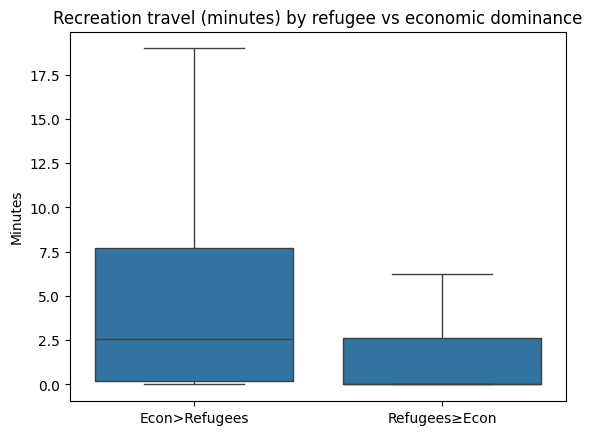

In [111]:
# Convert hours → minutes if you haven't already
df_ontario['rec_min'] = df_ontario['rec_hr'] * 60
# Winsorise the minute version (99 %)
cap = df_ontario['rec_min'].quantile(.99)
df_ontario['rec_min'] = df_ontario['rec_min'].clip(upper=cap)

# Quick box‑plot in minutes
import seaborn as sns, matplotlib.pyplot as plt
sns.boxplot(data=df_ontario, x='refugee_vs_econ', y='rec_min', showfliers=False)
plt.title('Recreation travel (minutes) by refugee vs economic dominance')
plt.ylabel('Minutes'); plt.xlabel('')
plt.show()

What this means:

In terms of clinics:
The median travel ( Refugee >= Econ) is 0.0 min which is like the clinic is basically on the doorstep of the refugee community. For Econ > Refugees it is 231 min which shows that Refugee-heavy neighborhoods get to a clinic 2 mins faster.

In terms of recreation centers: 
The median travel ( Refugee >= Econ) is 0.0 min which is like the recreation center is basically on the doorstep of the refugee community. For Econ > Refugees it is 2.57 min which shows that Refugee-heavy neighborhoods get to a recreation center 2 mins faster.

Refugee heavy neighborhoods are also more likely to have a clinic or recreation center. They are dense around urban cores where clinics and rec centers are more likely to be found.

Economic-immigrant-dominated ADAs are more surburban and half of them face about 2.5 mins of travel to a clinic or recreation center.

In [67]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [112]:
import geopandas as gpd
from pathlib import Path

ada_geo = gpd.read_file('/Users/preciousajilore/Documents/GitHub/Misc/BDG/lada000b21a_e.shp').to_crs(epsg=3857)

ada_on = ada_geo[ada_geo['PRUID'] == '35'].copy()
print("Ontario polygons:", ada_on.shape[0])



Ontario polygons: 1679


In [113]:
print(ada_on.columns.tolist())

['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry']


In [116]:


# 2.1  Load the ADA‑level CSV you cleaned earlier
df_on = pd.read_csv("/Users/preciousajilore/Documents/GitHub/Misc/BDG/ontario.csv", dtype={'ADA_code': str})  # keep code as string

# 2.2  Merge into a GeoDataFrame
gdf = ada_on.merge(df_on, left_on='ADAUID', right_on='ADA_code', how='left')

# 2.3  Quick check: missing joins?
print("Rows matched:", gdf['clinic_hr_min'].notna().sum(), "/", gdf.shape[0])


Rows matched: 1604 / 1679


In [84]:
pip install contextily

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 5.2 MB/s eta 0:00:0000:0100:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
print(gdf.columns.tolist())

['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry', 'ADA_code', 'CMA', 'refugeeF', 'asylumF', 'econF', 'nigeriaF', 'recentF_16_21', 'nprF', 'refugee_all', 'asylum_all', 'recent_all_16_21', 'total_pop', 'clinic_hr', 'rec_hr', 'refugeeF_share', 'asylumF_share', 'nprF_share', 'dominant_group', 'clinic_hr_min', 'rec_hr_min', 'refugee_vs_econ', 'clinic_min']


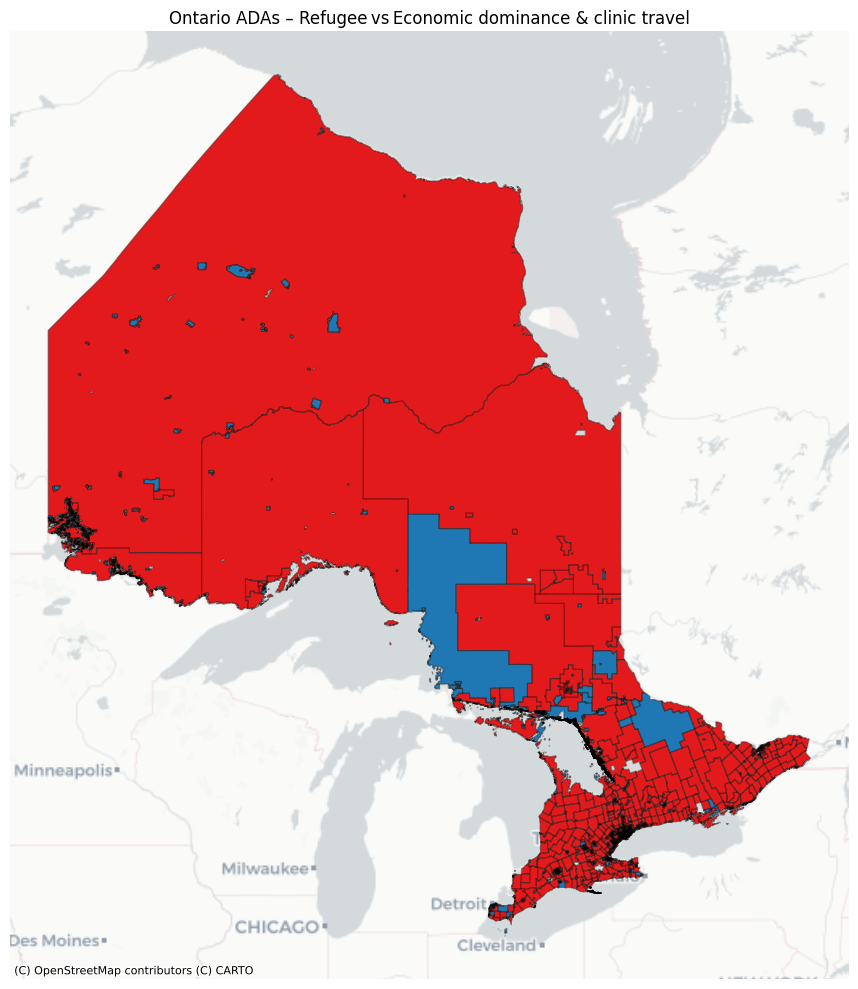

In [122]:
import contextily as cx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Choropleth
gdf.plot(ax=ax,
         color=gdf['plot_col'],        # ‘plot_col’ we created earlier
         edgecolor='white', linewidth=0.1)

# Clinic‑time circles
gdf.dropna(subset=['clinic_hr_min']).plot(
    ax=ax,
    markersize=gdf['clinic_hr_min'] * 1.5,
    facecolor='none', edgecolor='black',
    linewidth=0.8, alpha=0.4)

# Basemap (choose one that exists)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)   # <- works everywhere
# cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)  # alternative

ax.set_title("Ontario ADAs – Refugee vs Economic dominance & clinic travel")
ax.axis('off')
plt.tight_layout()
plt.savefig("map_ref_vs_econ_clinic.png", dpi=300) 
plt.show()


Based on our choropleth:

Blue polygons = ADAs where the count of female refugees ( refugeeF ) is greater than or equal to the count of female economic‑immigrant women ( econF ).

Red polygons = ADAs where economic‑immigrant women out‑number refugee women

Because refugees concentrate almost entirely in big‑city cores, those blue pockets show up as tight clusters around downtown Toronto, Ottawa, Windsor, Thunder Bay, and a few other urban centres. Everywhere else—especially the broad rural north and the outer suburbs—economic‑immigrant women dominate, so the polygons are red.

Visually links your stats to geography: refugee women cluster where services already exist (downtown), while economic‑immigrant women in outer suburbs/rural south spend the longest time reaching clinics. Pinpoints target ADAs for mobile clinics or new transit/service nodes.


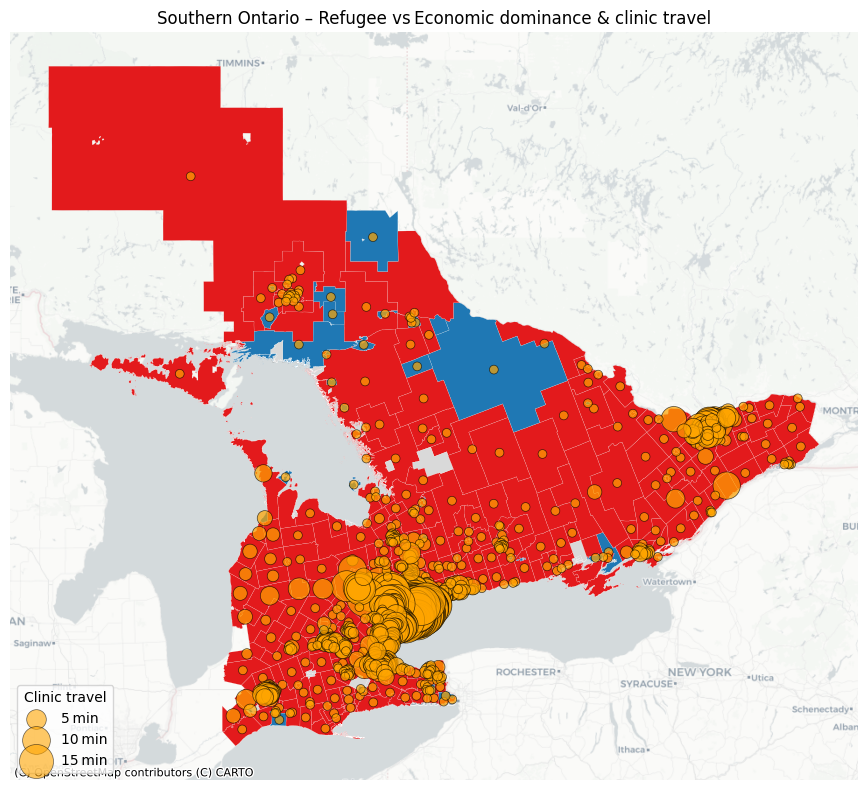

In [129]:

scale = 40           # try 40–60 until bubbles look good


color_map = {'Refugees≥Econ': '#1f78b4', 'Econ>Refugees': '#e31a1c'}
gdf['plot_col'] = gdf['refugee_vs_econ'].map(color_map).fillna('#d9d9d9')

# 2 ─ bounding‑box subset for southern Ontario
xmin, ymin, xmax, ymax = -9_070_000, 5_200_000, -8_250_000, 5_900_000
zoom = gdf.cx[xmin:xmax, ymin:ymax].copy()

# 3 ─ prep bubble data (clip 1–20 min) & build centroid GeoDF
zoom['clinic_vis'] = zoom['clinic_hr_min'].clip(lower=1, upper=20)
centroids = zoom.copy()
centroids.set_geometry(zoom.geometry.centroid, inplace=True)

# 4 ─ plot
fig, ax = plt.subplots(figsize=(9, 8))

# a) polygons
zoom.plot(ax=ax,
          color=zoom['plot_col'],
          edgecolor='white', linewidth=0.1, zorder=1)

# b) centroid bubbles   ← **now real circles**
centroids.dropna(subset=['clinic_vis']).plot(
    ax=ax,
    markersize=centroids['clinic_vis'] * scale,
    facecolor='orange', edgecolor='black',
    linewidth=0.5, alpha=0.7, zorder=3
)

# c) basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zorder=0)
ax.set_title("Southern Ontario – Refugee vs Economic dominance & clinic travel")
ax.axis('off')

# d) legend for bubbles
for m in [5, 10, 15]:
    ax.scatter([], [], s=m*scale, facecolors='orange', edgecolors='black',
               linewidth=0.5, alpha=0.6, label=f'{m} min')
ax.legend(title="Clinic travel", loc='lower left')

plt.tight_layout()
plt.savefig("map_southern_ON_ref_vs_econ_clinic.png", dpi=300)
plt.show()

So what you’re seeing isn’t “fewer circles” where access is good; it’s much smaller circles.
In the blue, refugee‑heavy downtown polygons the bubbles are so small they blend into the map—because the clinic is basically next door.
In the red outer‑suburban polygons the bubbles balloon in size, signalling a 10‑minute‑plus ride.

Rule of thumb on the map:
Circle diameter ∝ minutes → big bubble = long trip; tiny bubble = doorstep.

In [131]:
df_on.columns

Index(['ADA_code', 'CMA', 'refugeeF', 'asylumF', 'econF', 'nigeriaF',
       'recentF_16_21', 'nprF', 'refugee_all', 'asylum_all',
       'recent_all_16_21', 'total_pop', 'clinic_hr', 'rec_hr',
       'refugeeF_share', 'asylumF_share', 'nprF_share', 'dominant_group',
       'clinic_hr_min', 'rec_hr_min', 'refugee_vs_econ', 'clinic_min'],
      dtype='object')

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_60847/4063559757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_on, x='refugee_vs_econ', y='clinic_min',


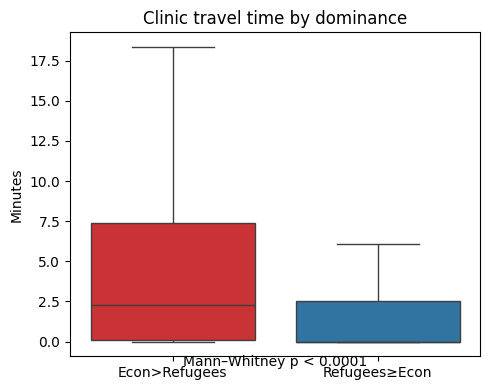

/var/folders/cl/h60hyp6s1jg6rr9n0nfgvphw0000gn/T/ipykernel_60847/4063559757.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_on, x='refugee_vs_econ', y='rec_hr_min',


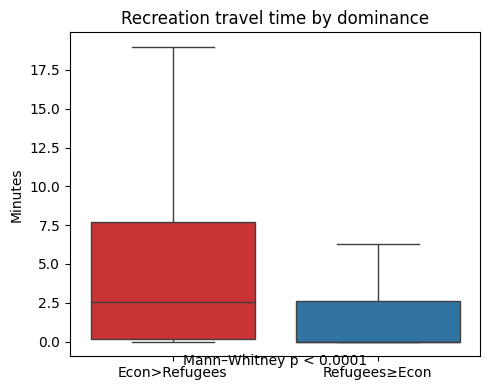

                 med_clinic  med_rec  pct_bad
refugee_vs_econ                              
Econ>Refugees          2.31     2.57    20.78
Refugees≥Econ          0.00     0.00     3.57


In [139]:
# 1. Consistent palette
palette = {'Refugees≥Econ': '#1f78b4', 'Econ>Refugees': '#e31a1c'}

## 1a. Clinic minutes box‑plot
plt.figure(figsize=(5,4))
sns.boxplot(data=df_on, x='refugee_vs_econ', y='clinic_min',
            palette=palette, showfliers=False)
plt.ylabel("Minutes"); plt.xlabel("")
plt.title("Clinic travel time by dominance")
plt.text(0.5, -1.5, "Mann–Whitney p < 0.0001", ha='center')
plt.tight_layout(); plt.savefig("box_clinic.png", dpi=300); plt.show()

## 1b. Recreation minutes box‑plot
plt.figure(figsize=(5,4))
sns.boxplot(data=df_on, x='refugee_vs_econ', y='rec_hr_min',
            palette=palette, showfliers=False)
plt.ylabel("Minutes"); plt.xlabel("")
plt.title("Recreation travel time by dominance")
plt.text(0.5, -1.5, "Mann–Whitney p < 0.0001", ha='center')
plt.tight_layout(); plt.savefig("box_rec.png", dpi=300); plt.show()

# 2. Effect‑size table
summary = (df_on
           .groupby('refugee_vs_econ')
           .agg(med_clinic=('clinic_min','median'),
                med_rec   =('rec_hr_min','median'),
                pct_bad   =('clinic_min', lambda s: (s>10).mean()*100))
           .round(2))

print(summary)
summary.to_csv("effect_size_table.csv")

Based on the clinic box plot, the economic-immigrant women (red), half the ADAs need approximately 2.5 mins to reach  a clinic and the worst take 18 mins.  The Refugee women (blue) take 0 mins to reach a clinic and the worst take 6 mins.

We see the same gap in the recreation box plox. 



In [140]:
ada_on.columns

Index(['ADAUID', 'DGUID', 'LANDAREA', 'PRUID', 'geometry'], dtype='object')

In [141]:
#LANDAREA is in square kilometres in the StatsCan cartographic file
# 1.  extract ADA_code and LANDAREA from the Ontario shapefile
area_df = ada_on[['ADAUID', 'LANDAREA']].copy()
area_df.rename(columns={'ADAUID': 'ADA_code'}, inplace=True)
area_df['ADA_code'] = area_df['ADA_code'].astype(str).str.zfill(8)

# 2.  merge into your analysis table
df_on = df_on.merge(area_df, on='ADA_code', how='left')

# 3.  check
print(df_on['LANDAREA'].describe())


count      1604.000000
mean        554.568125
std       10732.945434
min           0.075000
25%           2.156700
50%           4.198450
75%          21.637375
max      391747.095400
Name: LANDAREA, dtype: float64


In [146]:
'inv_density' in df_on.columns

False

In [148]:
import statsmodels.formula.api as smf


# population density (people per km²); use T1527 total pop already in df_on
df_on['pop_density'] = df_on['total_pop'] / df_on['LANDAREA']
df_on['log_density'] = np.log10(df_on['pop_density'].replace(0, np.nan))
df_on['inv_density'] = 1 / df_on['pop_density'].replace(0, np.nan) 

# share of refugee women in total pop
df_on['refugee_shareF'] = df_on['refugeeF'] / df_on['total_pop'].replace(0, np.nan)

# drop rows missing any RHS variable
reg_df = df_on.dropna(subset=['clinic_min', 'refugee_shareF', 'inv_density', 'CMA'])

# ---------------------------------------------------------------------------
#  MODEL A: inverse‑density (robust SE)
# ---------------------------------------------------------------------------
model_inv = smf.ols('clinic_min ~ refugee_shareF + inv_density',
                    data=reg_df).fit(cov_type="HC3")

print("\n=== Model A  |  Clinic_min ~ refugee_shareF + inv_density ===")
print(model_inv.summary().tables[1])

# ---------------------------------------------------------------------------
#  MODEL B: CMA fixed‑effects
# ---------------------------------------------------------------------------
model_cma = smf.ols('clinic_min ~ refugee_shareF + C(CMA)',
                    data=reg_df).fit(cov_type="HC3")

print("\n=== Model B  |  Clinic_min ~ refugee_shareF + CMA fixed effects ===")
# Show only intercept & refugee row to keep it short
print(model_cma.summary().tables[1])




=== Model A  |  Clinic_min ~ refugee_shareF + inv_density ===
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6777      0.249     10.742      0.000       2.189       3.166
refugee_shareF   135.9370     10.732     12.666      0.000     114.903     156.971
inv_density       -0.2685      0.300     -0.894      0.371      -0.857       0.320

=== Model B  |  Clinic_min ~ refugee_shareF + CMA fixed effects ===
                                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                   0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 42
  warnings.warn('covariance of constraints does not have full '


Refugee‑heavy ADAs sit in dense downtowns with clinics next door; this may be why refugees settle there in the first place.